In [180]:
import pandas as pd
import numpy as np
import glob

In [181]:
data = pd.read_csv(r"C:\INES\chp\chp_data_oneyear\chp_data_oneyear\Batch 1\data_127-0-0-1_2024-12-20 (0).csv", encoding = 'cp1252', sep = ';', skiprows=1)

In [182]:
csv_files = glob.glob(r"C:\INES\chp\chp_data_oneyear\chp_data_oneyear\Batch 1/*.csv")


data = pd.DataFrame()

for i,file in enumerate(csv_files):
    df = pd.read_csv(file, encoding = 'cp1252', sep = ';', skiprows=1)
    data = pd.concat([data,df])
    # if i >9 :
    #     break


In [183]:
data.shape
data.dropna(inplace=True)

In [184]:
data.head(1)

,Description,Temperatur Vorlauf BHKW 2 (Heizzentrale),Temperatur Vorlauf BHKW 1 (Heizzentrale),Volumenstrom BHKW 2 (Heizzentrale),Betriebszustand BHKW 2 (Heizzentrale),Heizleistung BHKW 2 (Heizzentrale),Stromzähler BHKW 2 (Heizzentrale) Leistung,Betriebszustand BHKW 1 (Heizzentrale),Temperatur Rücklauf BHKW 1 (Heizzentrale),Heizleistung BHKW 1 (Heizzentrale),Temperatur Rücklauf BHKW 2 (Heizzentrale),Stromzähler BHKW 1 (Heizzentrale) Leistung,Volumenstrom BHKW 1 (Heizzentrale)
1,2024/12/15 00:01:00,86.65,81.1,2.52,0.0,103.36,50.6,1.0,52.85,107.3,53.2,50.6,3.04


In [185]:
chp1 = data.loc[:, data.columns.str.contains('BHKW 2')]

In [186]:
chp1.head()

,Temperatur Vorlauf BHKW 2 (Heizzentrale),Volumenstrom BHKW 2 (Heizzentrale),Betriebszustand BHKW 2 (Heizzentrale),Heizleistung BHKW 2 (Heizzentrale),Stromzähler BHKW 2 (Heizzentrale) Leistung,Temperatur Rücklauf BHKW 2 (Heizzentrale)
1,86.65,2.52,0.0,103.36,50.60,53.20
2,86.50,2.52,0.0,103.26,50.48,53.20
3,86.55,2.52,0.0,103.35,50.60,53.25
4,86.55,2.54,0.0,103.80,50.60,53.30
5,86.60,2.53,0.0,102.75,50.60,53.30


In [187]:
chp1['Time'] = data['Description']

chp1['Time']= pd.to_datetime(chp1['Time'])
chp1.set_index('Time', inplace= True)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_19020\1299648038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['Time'] = data['Description']
C:\Users\Aqib\AppData\Local\Temp\ipykernel_19020\1299648038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['Time']= pd.to_datetime(chp1['Time'])


In [188]:
chp1.index.dtype
# data['Description'].dtype


dtype('<M8[ns]')

In [189]:
chp1.columns

Index(['Temperatur Vorlauf BHKW 2 (Heizzentrale)',
       'Volumenstrom BHKW 2 (Heizzentrale)',
       'Betriebszustand BHKW 2 (Heizzentrale)',
       'Heizleistung BHKW 2 (Heizzentrale)',
       'Stromzähler BHKW 2 (Heizzentrale) Leistung',
       'Temperatur Rücklauf BHKW 2 (Heizzentrale)'],
      dtype='object')

In [190]:
clmns = {'Temperatur Vorlauf BHKW 2 (Heizzentrale)' : 'Temperatur Vorlauf',
       'Betriebszustand BHKW 2 (Heizzentrale)' : 'Betriebszustand',
       'Temperatur Rücklauf BHKW 2 (Heizzentrale)': 'Temperatur Rücklauf',
        'Heizleistung BHKW 2 (Heizzentrale)': 'Heizleistung',
        'Stromzähler BHKW 2 (Heizzentrale) Leistung': 'Stromzähler Leistung',
        'Volumenstrom BHKW 2 (Heizzentrale)': 'Volumenstrom'}

In [191]:
chp1.rename(columns = clmns, inplace = True)

C:\Users\Aqib\AppData\Local\Temp\ipykernel_19020\209734648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1.rename(columns = clmns, inplace = True)


In [192]:
chp1['switch'] = chp1['Betriebszustand'] != chp1['Betriebszustand'].shift(1)  #Shift moves data forward, so comparing current with the preceeding value.

C:\Users\Aqib\AppData\Local\Temp\ipykernel_19020\2984553958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chp1['switch'] = chp1['Betriebszustand'] != chp1['Betriebszustand'].shift(1)  #Shift moves data forward, so comparing current with the preceeding value.


In [193]:
startup = chp1[(chp1['Heizleistung'] < 100) & (chp1['Betriebszustand'] == 0)]

In [194]:
firstswitch = startup[startup['switch']].index[0]  #the switch column has bool datatype

In [195]:
startup = startup.loc[firstswitch:,:]  # just to start from the first off to start up switch

In [196]:
# for row in startup.itertuples():
    # print(row.Index)

In [197]:
# startup['counter'] = np.full(len(startup), 0)

In [198]:
val = 0
Tplus_list = []
for i, rows in enumerate(startup.itertuples()):
    if rows.switch:  # check if switch is true
        val = 0
    
    Tplus_list.append(val)
    val += 1

In [199]:
startup['T_plus'] = Tplus_list

In [200]:
import matplotlib.pyplot as plt

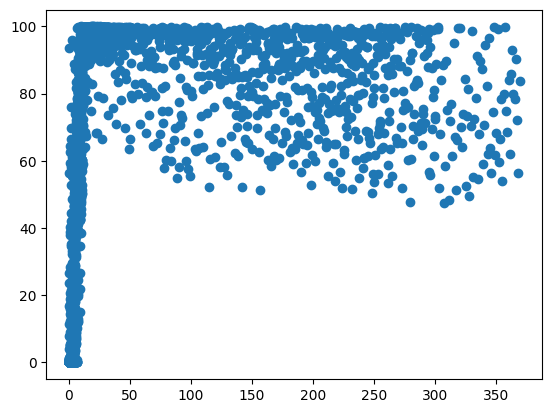

In [201]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')

# split into time steps(not worth)

In [202]:
startup['time_step'] = (startup['T_plus'] // 15) * 15

In [203]:
startup_15min = startup.groupby(by = 'time_step').mean()


Text(0, 0.5, 'Power output in Kw')

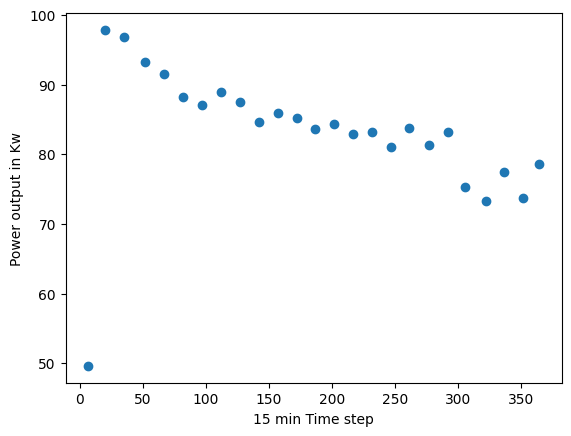

In [204]:
plt.plot(startup_15min['T_plus'], startup_15min['Heizleistung'], 'o')
plt.xlabel('15 min Time step')
plt.ylabel('Power output in Kw')

In [205]:
# pip install scikit-learn
startup_15min = startup.resample('15T').mean()
startup_15min.head()

,Temperatur Vorlauf,Volumenstrom,Betriebszustand,Heizleistung,Stromzähler Leistung,Temperatur Rücklauf,switch,T_plus,time_step
Time,,,,,,,,,
2024-11-04 02:15:00,64.596429,0.712143,0.0,19.864286,43.232143,54.850000,0.071429,6.5,0.000000
2024-11-04 02:30:00,89.186667,2.447333,0.0,94.737333,50.559333,56.753333,0.000000,21.0,14.000000
2024-11-04 02:45:00,87.425000,2.681000,0.0,98.093000,50.560000,56.695000,0.000000,33.5,28.500000
2024-11-04 03:00:00,86.692308,2.766923,0.0,99.432308,50.577692,56.607692,0.000000,45.0,38.076923
2024-11-04 03:15:00,86.750000,2.770000,0.0,99.400000,50.430000,56.600000,0.000000,52.0,45.000000


# Model fit

### line fit

In [206]:
# coefficients = np.polyfit(startup.loc[startup['T_plus']<11, 'T_plus'], startup.loc[startup['T_plus']<11, 'Heizleistung'], 1)
# slope, intercept = coefficients

In [207]:
filtered = startup[startup['T_plus']<11]

In [208]:
coefficients = np.polyfit(filtered['T_plus'], filtered['Heizleistung'], 1)
slope, intercept = coefficients

In [209]:
x = np.arange(0,30,1/60)

In [210]:
y = intercept + slope*x


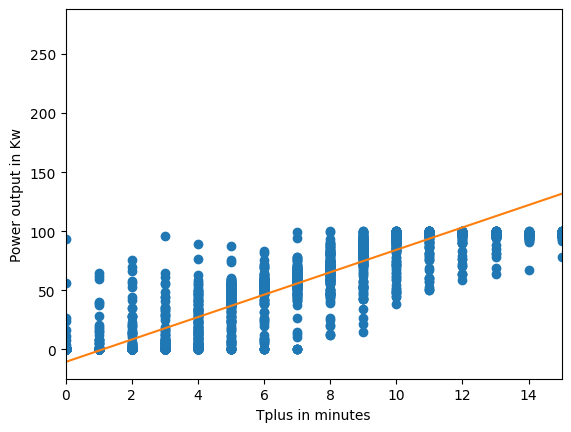

In [211]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')
plt.xlabel('Tplus in minutes')
plt.ylabel('Power output in Kw')
plt.plot(x,y)
plt.xlim(0,15)
plt.show()

In [212]:
intercept, slope

(-10.6407243225783, 9.485259128700074)

In [213]:
# y1 = intercept + slope*12

# y1

### Finding average

In [214]:
startup.loc[startup['T_plus']<16, 'Heizleistung'].mean()

52.07951399688958

### scikit

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
# x,y = list(filtered['T_plus']), list(filtered['Heizleistung'])

# x = np.array(x).reshape(-1, 1)
# model = LinearRegression()
# model.fit(x,y)
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)


In [217]:
# pip install statsmodels

In [218]:
import statsmodels.formula.api as smf 

In [219]:
results = smf.ols('Heizleistung ~ T_plus', data = filtered).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heizleistung   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     6108.
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:18:06   Log-Likelihood:                -7815.5
No. Observations:                1848   AIC:                         1.563e+04
Df Residuals:                    1846   BIC:                         1.565e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6407      0.698    -15.242      0.000     -12.010      -9.272
T_plus         9.4853      0.121     78.156      0.000       9.247       9.723
==============================================================================
Omnibus:                       98.977   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.149
Skew:                          -0.135   Prob(JB):                     5.05e-75
Kurtosis:                       5.091   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
filtered['T_plus2'] = filtered['T_plus']**2

C:\Users\Aqib\AppData\Local\Temp\ipykernel_19020\2180482959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['T_plus2'] = filtered['T_plus']**2


In [221]:
results2 = smf.ols('Heizleistung ~ T_plus + T_plus2', data = filtered).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heizleistung   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     3452.
Date:                Sat, 18 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:18:06   Log-Likelihood:                -7727.0
No. Observations:                1848   AIC:                         1.546e+04
Df Residuals:                    1845   BIC:                         1.548e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6295      0.888     -2.960      0.003      -4.372      -0.887
T_plus         3.8919      0.427      9.121      0.000       3.055       4.729
T_plus2        0.5675      0.042     13.618      0.000       0.486       0.649
==============================================================================
Omnibus:                      129.682   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.768
Skew:                           0.112   Prob(JB):                    3.51e-131
Kurtosis:                       5.784   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
intercept, tplus, tplus2 = results2.params
intercept, tplus, tplus2

(-2.6295185468380335, 3.8918955503856205, 0.5674829971397612)

In [223]:
y2 = intercept + tplus*x + tplus2*(x**2)

In [224]:
y2

array([ -2.62951855,  -2.56449599,  -2.49915816, ..., 622.96642033,
       623.59798008, 624.2298551 ])

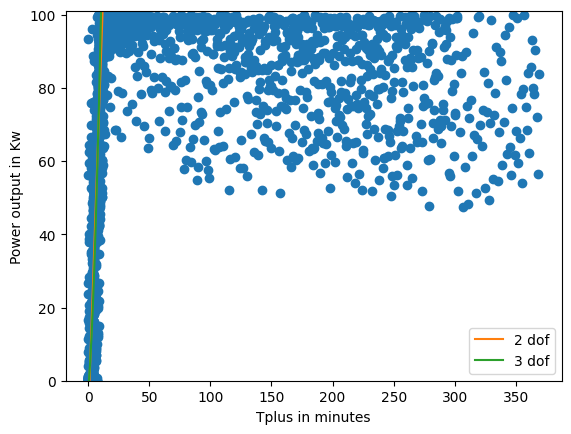

In [228]:
plt.plot(startup['T_plus'], startup['Heizleistung'], 'o')
plt.xlabel('Tplus in minutes')
plt.ylabel('Power output in Kw')
plt.plot(x,y, label = '2 dof')
plt.plot(x,y2, label = '3 dof')
plt.ylim(0,101)
plt.legend()
plt.show()

In [226]:
results.rsquared, results2.rsquared

(0.7679237988092711, 0.7891207383992738)

In [233]:
l = [1,2,3,4,5,6,6,7,54,3,2,4]
for i in range(len(l)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
